<a href="https://colab.research.google.com/github/clustering-jun/GNU-MachineLearning/blob/main/L12-3_%EC%97%B0%EA%B4%80_%EA%B7%9C%EC%B9%99_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Apriori 알고리즘 구현**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

train = [["A", "B", "C", "D", "E"],
            ["B", "C"],
            ["A", "B", "F"],
            ["A", "B", "G"],
            ["A", "F", "H"]]

In [ ]:
te = TransactionEncoder()
train_ar = te.fit(train).transform(train)

print(te.columns_)
print(train_ar)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
[[ True  True  True  True  True False False False]
 [False  True  True False False False False False]
 [ True  True False False False  True False False]
 [ True  True False False False False  True False]
 [ True False False False False  True False  True]]


In [ ]:
df = pd.DataFrame(train_ar, columns= te.columns_)
df

,A,B,C,D,E,F,G,H
0,True,True,True,True,True,False,False,False
1,False,True,True,False,False,False,False,False
2,True,True,False,False,False,True,False,False
3,True,True,False,False,False,False,True,False
4,True,False,False,False,False,True,False,True


In [ ]:
freq = df.sum().to_frame('Frequency')
freq_sort = freq.sort_values('Frequency', ascending=False)
freq_sort

,Frequency
A,4
B,4
C,2
F,2
D,1
E,1
G,1
H,1


In [ ]:
freq_sort['Support'] = freq_sort['Frequency'] / len(train)
freq_sort

,Frequency,Support
A,4,0.8
B,4,0.8
C,2,0.4
F,2,0.4
D,1,0.2
E,1,0.2
G,1,0.2
H,1,0.2


<Axes: title={'center': 'Frequent Items'}>

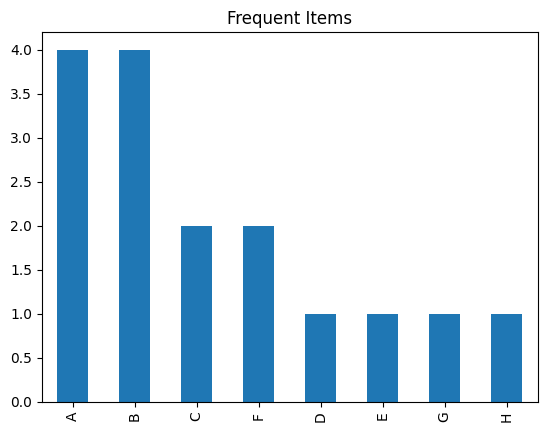

In [ ]:
freq_sort['Frequency'].plot(kind = 'bar', title = 'Frequent Items')

<Axes: >

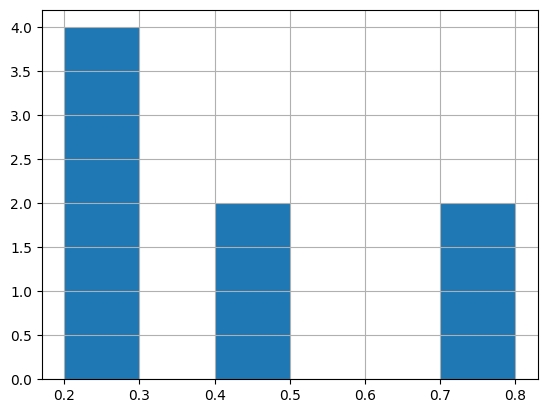

In [ ]:
freq_sort['Support'].hist(bins = 6)

In [ ]:
freq_items = apriori(df, min_support=0.4, use_colnames=True)
freq_items

,support,itemsets
0,0.8,(A)
1,0.8,(B)
2,0.4,(C)
3,0.4,(F)
4,0.6,"(A, B)"
5,0.4,"(F, A)"
6,0.4,"(C, B)"


In [ ]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(A),(B),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.250000,0.6,-0.25,0.75
1,(B),(A),0.8,0.8,0.6,0.75,0.9375,1.0,-0.04,0.8,-0.250000,0.6,-0.25,0.75
2,(F),(A),0.4,0.8,0.4,1.00,1.2500,1.0,0.08,inf,0.333333,0.5,1.00,0.75
3,(C),(B),0.4,0.8,0.4,1.00,1.2500,1.0,0.08,inf,0.333333,0.5,1.00,0.75


In [ ]:
rules = rules[rules['lift'] > 1]
rules.sort_values(by='confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(F),(A),0.4,0.8,0.4,1.0,1.25,1.0,0.08,inf,0.333333,0.5,1.0,0.75
3,(C),(B),0.4,0.8,0.4,1.0,1.25,1.0,0.08,inf,0.333333,0.5,1.0,0.75


In [ ]:
rules[rules.antecedents.apply(lambda x: 'F' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(F),(A),0.4,0.8,0.4,1.0,1.25,1.0,0.08,inf,0.333333,0.5,1.0,0.75


In [ ]:
rules[rules.consequents.apply(lambda x: 'B' in x )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(C),(B),0.4,0.8,0.4,1.0,1.25,1.0,0.08,inf,0.333333,0.5,1.0,0.75


### **연습 문제**
- 다음의 경우에서 Apriori 알고리즘을 사용하여 연관 규칙을 학습하시오.

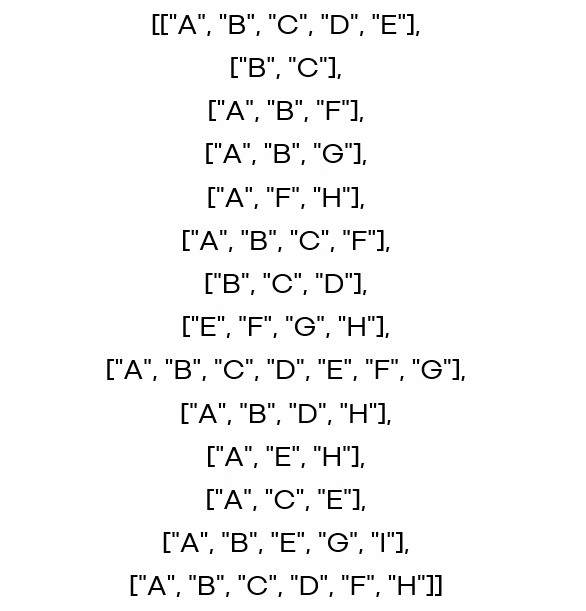


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

train = [["A", "B", "C", "D", "E"],
            ["B", "C"],
            ["A", "B", "F"],
            ["A", "B", "G"],
            ["A", "F", "H"],
            ["A", "B", "C", "F"],
            ["B", "C", "D"],
            ["E", "F", "G", "H"],
            ["A", "B", "C", "D", "E", "F", "G"],
            ["A", "B", "D", "H"],
            ["A", "E", "H"],
            ["A", "C", "E"],
            ["A", "B", "E", "G", "I"],
            ["A", "B", "C", "D", "F", "H"]]

In [ ]:
te = TransactionEncoder()
train_ar = te.fit(train).transform(train)

df = pd.DataFrame(train_ar, columns= te.columns_)

In [ ]:
freq = df.sum().to_frame('Frequency')
freq_sort = freq.sort_values('Frequency', ascending=False)
freq_sort

,Frequency
A,11
B,10
C,7
E,6
F,6
D,5
H,5
G,4
I,1


In [ ]:
freq_sort['Support'] = freq_sort['Frequency'] / len(train)
freq_sort

,Frequency,Support
A,11,0.785714
B,10,0.714286
C,7,0.500000
E,6,0.428571
F,6,0.428571
D,5,0.357143
H,5,0.357143
G,4,0.285714
I,1,0.071429


In [ ]:
freq_items = apriori(df, min_support=0.4, use_colnames=True)
freq_items

,support,itemsets
0,0.785714,(A)
1,0.714286,(B)
2,0.500000,(C)
3,0.428571,(E)
4,0.428571,(F)
5,0.571429,"(A, B)"
6,0.428571,"(C, B)"


In [ ]:
# 빈발 항목집합들로부터 가능한 모든 연관규칙을 만들되, 그중에서 confidence가 0.7 이상인 규칙만 남겨라.

rules = association_rules(freq_items, metric='confidence', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(A),(B),0.785714,0.714286,0.571429,0.727273,1.018182,1.0,0.010204,1.047619,0.083333,0.615385,0.045455,0.763636
1,(B),(A),0.714286,0.785714,0.571429,0.800000,1.018182,1.0,0.010204,1.071429,0.062500,0.615385,0.066667,0.763636
2,(C),(B),0.500000,0.714286,0.428571,0.857143,1.200000,1.0,0.071429,2.000000,0.333333,0.545455,0.500000,0.728571


In [ ]:
# 연관규칙 결과(rules DataFrame)를 의미 있는 규칙만 남기고, 그중에서도 신뢰도가 높은 순서로 정렬하는 후처리 단계

rules = rules[rules['lift'] > 1]
rules.sort_values(by='confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(C),(B),0.500000,0.714286,0.428571,0.857143,1.200000,1.0,0.071429,2.000000,0.333333,0.545455,0.500000,0.728571
1,(B),(A),0.714286,0.785714,0.571429,0.800000,1.018182,1.0,0.010204,1.071429,0.062500,0.615385,0.066667,0.763636
0,(A),(B),0.785714,0.714286,0.571429,0.727273,1.018182,1.0,0.010204,1.047619,0.083333,0.615385,0.045455,0.763636
